# TIME SERIES RODRIGO



## 1) Descrever a série temporal de acordo com as suas componentes e propriedades. Desde a tendência, sazonalidade, heterocedastidade, entre outros.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsforecast.models import auto_arima
from src.tde import UnivariateTDE


ImportError: cannot import name 'auto_arima' from 'statsforecast.models' (c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsforecast\models.py)

BASE DE DADOS

In [21]:
df = pd.read_csv("energy_load_pt.csv")

In [22]:
df.shape

(13104, 2)

In [23]:
df.head()

,datetime,load
0,2020-11-17 08:00:00,5159.0
1,2020-11-17 09:00:00,4985.0
2,2020-11-17 10:00:00,4717.0
3,2020-11-17 11:00:00,4356.0
4,2020-11-17 12:00:00,4086.0


In [24]:
df.datetime.shape

(13104,)

In [25]:
# existem valores omissos
df.isna().sum()

datetime    0
load        2
dtype: int64

In [26]:
df.load.shape

(13104,)

In [27]:
df.tail()

,datetime,load
13099,2022-05-17 04:00:00,5190.0
13100,2022-05-17 05:00:00,5297.0
13101,2022-05-17 06:00:00,5441.0
13102,2022-05-17 07:00:00,5735.0
13103,2022-05-17 08:00:00,5418.0


In [28]:
series.head()

datetime
2020-11-17 08:00:00    5159.0
2020-11-17 09:00:00    4985.0
2020-11-17 10:00:00    4717.0
2020-11-17 11:00:00    4356.0
2020-11-17 12:00:00    4086.0
Name: load, dtype: float64

<Axes: xlabel='datetime'>

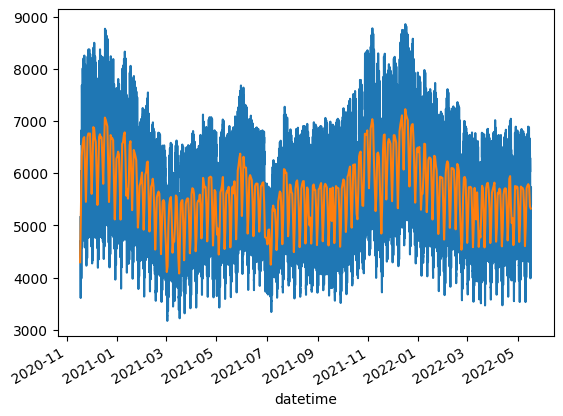

In [29]:
series = pd.Series(df['load'])
series.index = pd.to_datetime(df['datetime'])
series.plot()
series.resample('D').mean().plot()

<Axes: xlabel='datetime'>

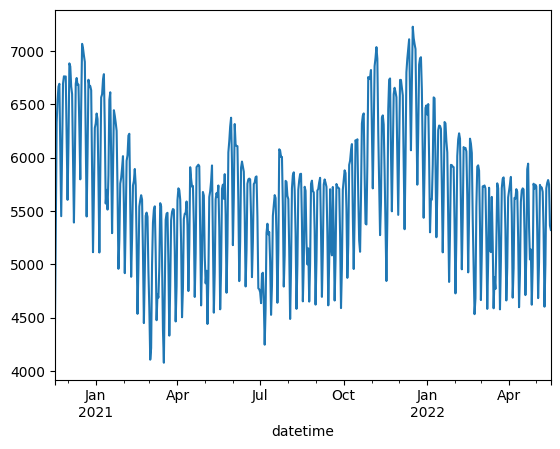

In [30]:
series_d = series.resample('D').mean()
series_d.plot()

<Axes: ylabel='Frequency'>

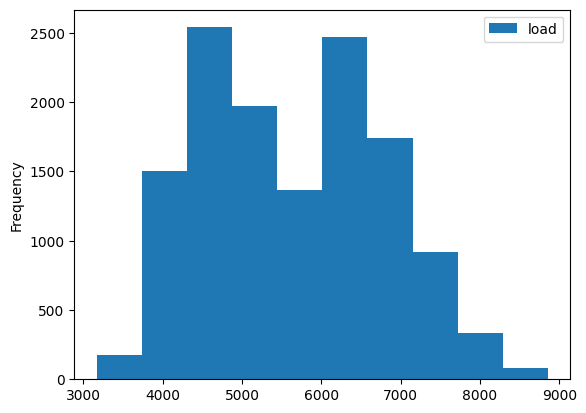

In [31]:
# tem valores extremos
df.plot.hist()

In [32]:
from pmdarima.arima import ndiffs, nsdiffs

# kpss test
ndiffs(series_d, test='kpss')

1

In [33]:
# augmented dickey-fuller
ndiffs(series_d, test='adf')

1

In [34]:
# testes para sazonalidade
nsdiffs(series_d, test='ocsb', m=30)

0

In [35]:
nsdiffs(series_d, test='ch', m=30)

0

<Axes: xlabel='datetime'>

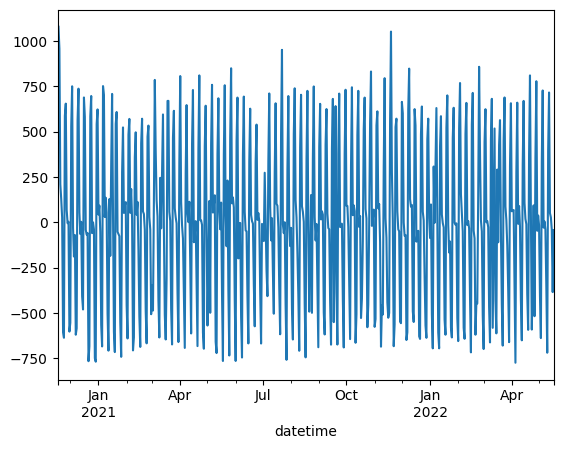

In [36]:
# removendo a tendencia
series_d.diff(periods=1).plot()

<Axes: xlabel='datetime'>

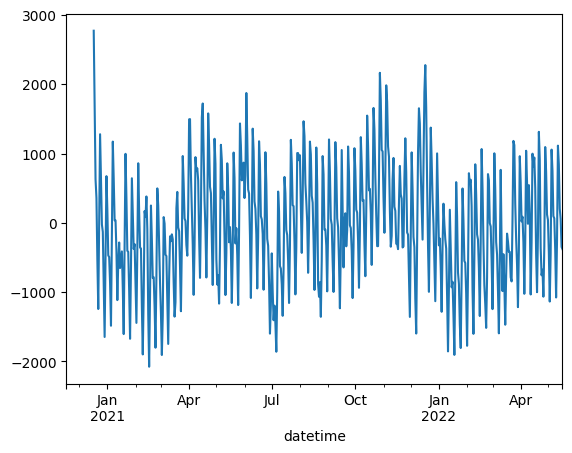

In [37]:
# removendo a sazonalidade
series_d.diff(periods=30).plot()

<Axes: xlabel='datetime'>

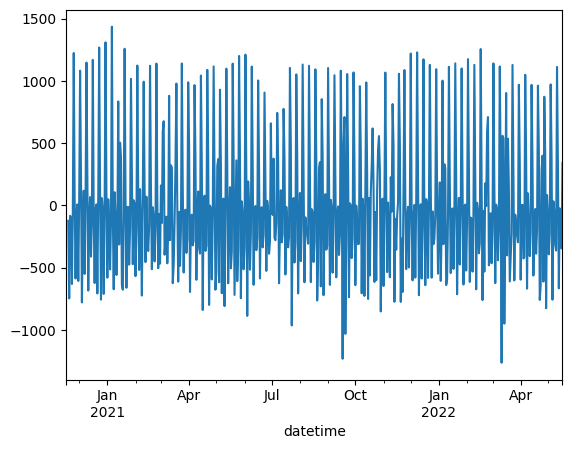

In [38]:
# residuos
series_d.diff(periods=1).diff(periods=1).plot()

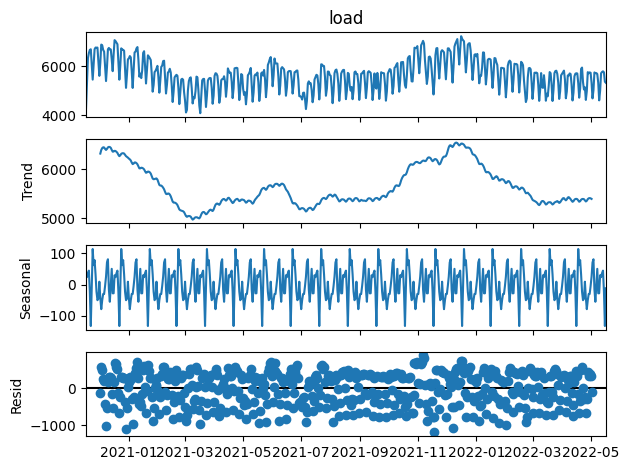

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(series_d,
                            model='additive',
                            period=30)

plt = result.plot()


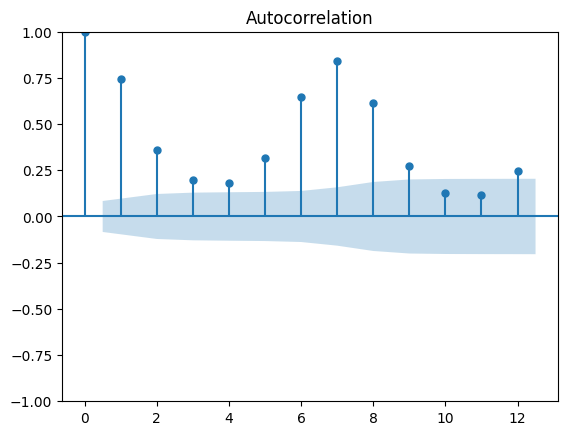

In [40]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt = plot_acf(series_d, lags=12)

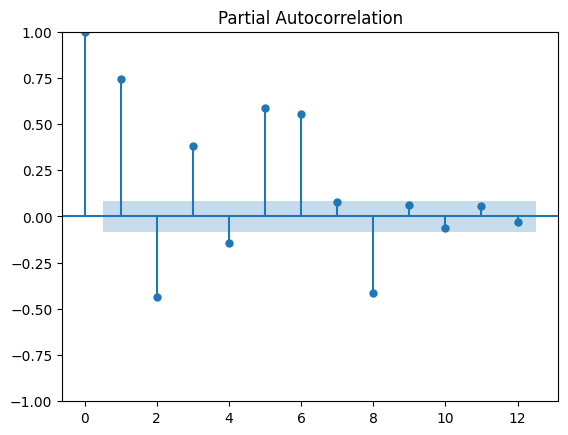

In [41]:
plt = plot_pacf(series_d, lags=12)

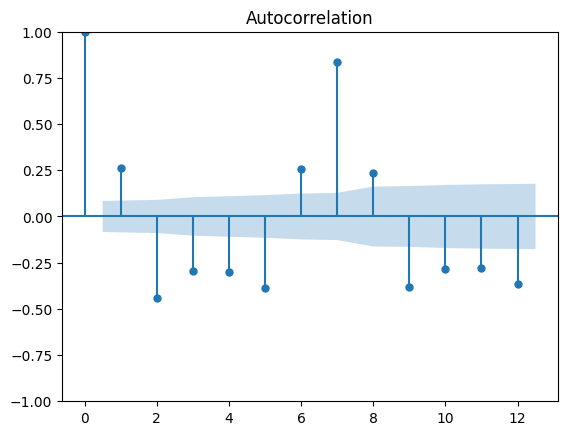

In [42]:
plt = plot_acf(series_d.diff(periods=1)[4:], lags=12)

In [43]:
import os
os.listdir('..')

['DCTP']

In [46]:
# heterocedastidade
from src.heteroskedasticity import het_tests

p_value = het_tests(series_d, test='white')
# p_value = het_tests(series, test='breuschpagan')

p_value

ModuleNotFoundError: No module named 'src'

In [48]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox

?boxcox
# box-cox
transformed_data, best_lambda = boxcox(series_day)

print(transformed_data[:5])
print(series.values[:5])
print(best_lambda)

NameError: name 'series_day' is not defined

Signature: boxcox(x, lmbda=None, alpha=None, optimizer=None)
Docstring:
Return a dataset transformed by a Box-Cox power transformation.

Parameters
----------
x : ndarray
    Input array to be transformed.

    If `lmbda` is not None, this is an alias of
    `scipy.special.boxcox`.
    Returns nan if ``x < 0``; returns -inf if ``x == 0 and lmbda < 0``.

    If `lmbda` is None, array must be positive, 1-dimensional, and
    non-constant.

lmbda : scalar, optional
    If `lmbda` is None (default), find the value of `lmbda` that maximizes
    the log-likelihood function and return it as the second output
    argument.

    If `lmbda` is not None, do the transformation for that value.

alpha : float, optional
    If `lmbda` is None and `alpha` is not None (default), return the
    ``100 * (1-alpha)%`` confidence  interval for `lmbda` as the third
    output argument. Must be between 0.0 and 1.0.

    If `lmbda` is not None, `alpha` is ignored.
optimizer : callable, optional
    If `lmbda` 

In [47]:
pd.Series(transformed_data).plot()

NameError: name 'transformed_data' is not defined

## 2) Descrever a estrutura ARIMA que melhor se adequa aos dados

In [49]:
# divisao entre treino e validacao
from sklearn.model_selection import train_test_split

train, test = train_test_split(series_day, shuffle=False, test_size=0.3)

NameError: name 'series_day' is not defined

In [30]:
train.tail()

NameError: name 'train' is not defined

In [31]:
test.head()

NameError: name 'test' is not defined

In [32]:
# auto arima
import pmdarima as pm

model = pm.auto_arima(train, m=30, trace=True, suppress_warnings=True)

NameError: name 'train' is not defined

In [33]:
?pm.auto_arima

Signature:
pm.auto_arima(
    y,
    X=None,
    start_p=2,
    d=None,
    start_q=2,
    max_p=5,
    max_d=2,
    max_q=5,
    start_P=1,
    D=None,
    start_Q=1,
    max_P=2,
    max_D=1,
    max_Q=2,
    max_order=5,
    m=1,
    seasonal=True,
    stationary=False,
    information_criterion='aic',
    alpha=0.05,
    test='kpss',
    seasonal_test='ocsb',
    stepwise=True,
    n_jobs=1,
    start_params=None,
    trend=None,
    method='lbfgs',
    maxiter=50,
    offset_test_args=None,
    seasonal_test_args=None,
    suppress_warnings=True,
    error_action='trace',
    trace=False,
    random=False,
    random_state=None,
    n_fits=10,
    return_valid_fits=False,
    out_of_sample_size=0,
    scoring='mse',
    scoring_args=None,
    with_intercept='auto',
    sarimax_kwargs=None,
    **fit_args,
)
Docstring:
Automatically discover the optimal order for an ARIMA model.

The auto-ARIMA process seeks to identify the most optimal
parameters for an ``ARIMA`` model, settling o

In [50]:
plot=model.plot_diagnostics(figsize=(15, 12))

NameError: name 'model' is not defined

In [35]:
previsoes = model.predict(60)
previsoes

NameError: name 'model' is not defined

In [36]:
test = test.rename('Atual')
previsoes = pd.Series(previsoes, index=test.index).rename('Previsões')
ax = train.plot()
ax = test.plot(legend=True,color='red', figsize=(12,6),title='Previsões com Auto Arima')
previsoes.plot(legend=True, color='green')

NameError: name 'test' is not defined

In [37]:
# computing the error
from src.error import MASE

err = MASE(train, test, previsoes)

err

ModuleNotFoundError: No module named 'src'

In [38]:
AR = pm.ARIMA(order=(5,1,2))
MA = pm.ARIMA(order=(0,0,0))
AR.fit(train)

NameError: name 'train' is not defined

In [39]:
AR.summary()

AttributeError: 'ARIMA' object has no attribute 'arima_res_'

In [40]:
plot=AR.plot_diagnostics(figsize=(15, 15))

AttributeError: 'ARIMA' object has no attribute 'arima_res_'

In [41]:
MA.fit(train)

MA.summary()

NameError: name 'train' is not defined

In [42]:
plot=MA.plot_diagnostics(figsize=(15, 15))

AttributeError: 'ARIMA' object has no attribute 'arima_res_'

In [43]:
previsoes = AR.predict(50)
previsoes = pd.Series(previsoes, index=test.index).rename('ARIMA')
ax = train.plot()
ax = test.plot(legend=True,color='red', figsize=(15,7),title='Previsões con ARIMA')
previsoes.plot(legend=True, color='green')

NotFittedError: Model has not been fit!

In [53]:
err = MASE(train, test, previsoes)

err

NameError: name 'MASE' is not defined

# Exponential Smoothing

In [54]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
?ETSModel


ses_model_manual = SimpleExpSmoothing(train, initialization_method="heuristic").fit(smoothing_level=0.5, optimized=False)

ses_model_auto = SimpleExpSmoothing(train, initialization_method="estimated").fit()

NameError: name 'train' is not defined

In [55]:
ses_model_manual.summary()

NameError: name 'ses_model_manual' is not defined

In [56]:
ses_model_auto.summary()

NameError: name 'ses_model_auto' is not defined

In [57]:
ses_previsoes = ses_model_auto.forecast(50)

print(MASE(train,test,ses_previsoes))

NameError: name 'ses_model_auto' is not defined

In [58]:
ses_previsoes = pd.Series(ses_previsoes, index=test.index).rename('SES')
ax = train.plot()
ax = test.plot(legend=True,color='red', figsize=(15,7),title='Previsões com SES')
ses_previsoes.plot(legend=True, color='green')

NameError: name 'ses_previsoes' is not defined

# Método de Holt

In [59]:
holt_model1 = Holt(train, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2, optimized=False)

forecasts_holt_m1 = holt_model1.forecast(50).rename("Holt's linear trend")

holt_model2 = Holt(train, exponential=True, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2, optimized=False)

forecasts_holt_m2 = holt_model2.forecast(50).rename("Exponential trend")

holt_model3 = Holt(train, damped_trend=True, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2)

forecasts_holt_m3 = holt_model3.forecast(50).rename("Additive damped trend")

plt.figure(figsize=(12, 8))
plt.plot(test, marker="o", color="black")
(line1,) = plt.plot(forecasts_holt_m1, marker="o", color="blue")
(line2,) = plt.plot(forecasts_holt_m2, marker="o", color="red")
(line3,) = plt.plot(forecasts_holt_m3, marker="o", color="green")
plt.legend([line1, line2, line3], [forecasts_holt_m1.name, forecasts_holt_m2.name, forecasts_holt_m3.name])

NameError: name 'train' is not defined

In [60]:
# Holt’s Winters Seasonal Exponential Smoothing
es = ExponentialSmoothing(
    train,
    seasonal_periods=4,
    trend="add",
    seasonal="add",
    use_boxcox=False,
    initialization_method="estimated",
).fit()

previsoes_es = es.forecast(50).rename("Holt’s Winters Seasonal Exponential Smoothing")

NameError: name 'train' is not defined

In [61]:
print(MASE(train,test,previsoes_es))

previsoes_es = previsoes_es.rename('ES')
ax = train.plot()
ax = test.plot(legend=True,color='red', figsize=(12,6),title='Previsões com ES')
previsoes_es.plot(legend=True, color='green')

NameError: name 'MASE' is not defined

In [62]:
ets = ETSModel(
    train,
    seasonal_periods=30,
    trend="mul",
    seasonal="mul",
    initialization_method="estimated",
).fit()

previsoes_ets = ets.forecast(50).rename("ETS")

NameError: name 'train' is not defined

In [63]:
ets.summary()

NameError: name 'ets' is not defined

In [64]:
print(MASE(train,test,previsoes_ets))

previsoes_ets = previsoes_ets.rename('ETS')
ax = train.plot()
ax = test.plot(legend=True,color='red', figsize=(15,7),title='Previsões com ETS')
previsoes_ets.plot(legend=True, color='green')

NameError: name 'MASE' is not defined

In [65]:
from sktime.forecasting.naive import NaiveForecaster

?NaiveForecaster

naive = NaiveForecaster(strategy='mean')
naive.fit(train)

previsoes_naive = naive.predict(fh=[i for i in range(1,60)])

previsoes_naive

NameError: name 'train' is not defined

In [ ]:
print(MASE(train,test,previsoes_naive))

previsoes_naive = previsoes_naive.rename('NAIVE')
ax = train.plot()
ax = test.plot(legend=True,color='red', figsize=(15,7),title='Previsoes com Naive')
previsoes_naive.plot(legend=True, color='green')

# Regressores

In [ ]:
from src.tde import UnivariateTDE

# série para matriz
UnivariateTDE(data=series, k=5, horizon=1)

In [66]:
# vários pontos no futuro
UnivariateTDE(data=series, k=5, horizon=5)

NameError: name 'UnivariateTDE' is not defined

In [67]:
series_df = UnivariateTDE(data=series_day, k=5, horizon=1)
series_df.head()

NameError: name 'UnivariateTDE' is not defined

In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# separando as variáveis explicativas
X = series_df.drop('t+1', axis=1)
y = series_df['t+1']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

NameError: name 'series_df' is not defined

In [69]:
# treinando uma Random Forest
model = RandomForestRegressor()
model.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [70]:
# previsoes
previseos = model.predict(X_test)
previsoes[:10]

NameError: name 'X_test' is not defined

In [71]:
# computing the error
from src.error import MASE

MASE(y_train, y_test, previsoes)

ModuleNotFoundError: No module named 'src'

In [72]:
y_test = y_test.rename('Atual')
previsoes = pd.Series(previsoes, index=y_test.index).rename('RF')
ax = y_train.plot()
ax = y_test.plot(legend=True,color='red', figsize=(15,7),title='Previsoes com RF')
previsoes.plot(legend=True, color='green')

NameError: name 'y_test' is not defined

In [73]:
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
linear_reg.fit(X_train, y_train)
rf.fit(X_train, y_train)
tree.fit(X_train, y_train)
lgbm.fit(X_train, y_train)

NameError: name 'ridge' is not defined

In [74]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor

ridge = Ridge()
lasso = Lasso()
linear_reg = LinearRegression()
rf = RandomForestRegressor()
tree = DecisionTreeRegressor()
lgbm = LGBMRegressor()

ModuleNotFoundError: No module named 'lightgbm'

In [75]:
models = [ridge, lasso, linear_reg, rf, tree, lgbm]
colors = ['yellow','orange','green','grey','black','purple']
previsoes = []
for j,m in enumerate(models):
    print(j)
    pred = m.predict(X_test)
    pred = pd.Series(pred, index=y_test.index).rename(f'Previsao {j}')
    previsoes.append(pred)

NameError: name 'ridge' is not defined

In [76]:
ax = y_train.plot()
ax = y_test.plot(legend=True,color='red', figsize=(12,6))
for j, pred in enumerate(previsoes):
    pred.plot(legend=True, color=colors[j])

NameError: name 'y_train' is not defined

In [77]:
for pred in previsoes:
    print(MASE(y_train, y_test, pred))

NameError: name 'previsoes' is not defined

In [78]:
ridge.fit(X_train[1:], y_train.diff()[1:])
lasso.fit(X_train[1:], y_train.diff()[1:])
linear_reg.fit(X_train[1:], y_train.diff()[1:])
rf.fit(X_train[1:], y_train.diff()[1:])
tree.fit(X_train[1:], y_train.diff()[1:])
lgbm.fit(X_train[1:], y_train.diff()[1:])

NameError: name 'ridge' is not defined

In [79]:
models = [ridge, lasso, linear_reg, rf, tree, lgbm]
for m in models:
    pred = m.predict(X_test)
    print(MASE(y_train.diff()[1:], y_test.diff()[1:], pred[1:]))

NameError: name 'ridge' is not defined

## 3) Avaliar diferentes métodos de aprendizagem máquina com validação cruzada.

VALIDAÇÃO CRUZADA

In [80]:
series_day.plot()

NameError: name 'series_day' is not defined

In [81]:
from src.tde import UnivariateTDE

ModuleNotFoundError: No module named 'src'

In [82]:
# prever o próximo valor com base nos 6 anteriores
series_tde = UnivariateTDE(series_day.diff(), horizon=1, k=6)
series_tde.head()

NameError: name 'UnivariateTDE' is not defined

In [83]:
# separar variáveis explicativas da variável objetivo
X = series_tde.drop('t+1', axis=1)
y = series_tde['t+1']

NameError: name 'series_tde' is not defined

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

NameError: name 'X' is not defined

In [85]:
X_train.head()

NameError: name 'X_train' is not defined

In [86]:
y_train.head()

NameError: name 'y_train' is not defined

ESTIMAÇÃO DE DESEMPENHO

In [87]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [88]:
cv = TimeSeriesSplit(n_splits=5)

cv_err = []
for tr_idx, ts_idx in cv.split(X_train, y_train):
    print('Indices de Treino:')
    print(tr_idx[-5:])
    X_tr = X_train.values[tr_idx]
    y_tr = y_train.values[tr_idx]

    X_vl = X_train.values[ts_idx]
    y_vl = y_train.values[ts_idx]

    print('Treinando o modelo')
    model = Ridge()

    model.fit(X_tr, y_tr)
    print('Fazendo previsões')
    pred = model.predict(X_vl)

    print('Computando o erro')
    err = mean_absolute_error(y_vl, pred)
    cv_err.append(err)

    
print(cv_err)

NameError: name 'X_train' is not defined

In [89]:
# erro estimado em validação cruzada
print(f'erro medio é: {np.mean(cv_err)}')

erro medio é: nan


C:\Users\PC\Desktop\NDS\DCTP\venv_test\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\PC\Desktop\NDS\DCTP\venv_test\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [90]:
# erro que obtemos no teste
model = Ridge()
model.fit(X_train, y_train)
pred_test = model.predict(X_test)
err_test = mean_absolute_error(y_test, pred_test)
print(f'Erro do teste é: {err_test}')

NameError: name 'X_train' is not defined

In [91]:
model_list = {
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'RandomForestRegressor': RandomForestRegressor(n_estimators=10),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'KNeighborsRegressor': KNeighborsRegressor(),
}

from sklearn.model_selection import cross_val_score

In [92]:
err_by_method = {}
for method in model_list:
    print(f'Running model: {method}')
    cv_error = cross_val_score(model_list[method],
                               X_train,
                               y_train,
                               cv=cv,
                               scoring='neg_mean_absolute_error')

    err_by_method[method] = -np.mean(cv_error)

Running model: Ridge


NameError: name 'X_train' is not defined

C:\Users\PC\AppData\Local\Temp\ipykernel_10168\792335415.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.Series(err_by_method).plot.bar()


IndexError: index 0 is out of bounds for axis 0 with size 0

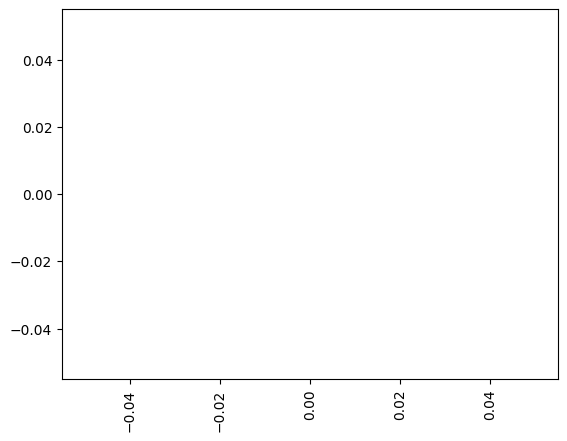

In [93]:
pd.Series(err_by_method).plot.bar()

In [ ]:
from pprint import pprint
pprint(err_by_method)

Seleção de Parâmetros

In [94]:
from sklearn.model_selection import GridSearchCV

?GridSearchCV

parameters = {'weights': ['uniform', 'distance'],
              'n_neighbors': [1, 5, 10]}

Init signature:
GridSearchCV(
    estimator,
    param_grid,
    *,
    scoring=None,
    n_jobs=None,
    refit=True,
    cv=None,
    verbose=0,
    pre_dispatch='2*n_jobs',
    error_score=nan,
    return_train_score=False,
)
Docstring:     
Exhaustive search over specified parameter values for an estimator.

Important members are fit, predict.

GridSearchCV implements a "fit" and a "score" method.
It also implements "score_samples", "predict", "predict_proba",
"decision_function", "transform" and "inverse_transform" if they are
implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized
by cross-validated grid-search over a parameter grid.

Read more in the :ref:`User Guide <grid_search>`.

Parameters
----------
estimator : estimator object
    This is assumed to implement the scikit-learn estimator interface.
    Either estimator needs to provide a ``score`` function,
    or ``scoring`` must be passed.

param_grid : dict or list of

In [95]:
model = KNeighborsRegressor()
cv = TimeSeriesSplit(n_splits=5)
​
grid_search = GridSearchCV(estimator=model,
                           param_grid=parameters,
                           cv=cv, 
                           refit=True)
​

SyntaxError: invalid non-printable character U+200B (3093926812.py, line 3)

In [96]:
grid_search.fit(X_train, y_train)

NameError: name 'grid_search' is not defined

In [97]:
grid_search.best_estimator_

NameError: name 'grid_search' is not defined

In [98]:
pred_test_best = grid_search.predict(X_test)
err_test = mean_absolute_error(y_test, pred_test_best)
print(f'Test error is: {err_test}')

NameError: name 'grid_search' is not defined